In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving nba_draft_combine_all_years_cleaned.csv to nba_draft_combine_all_years_cleaned (2).csv


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import pearsonr


In [ ]:
df = pd.read_csv("nba_draft_combine_all_years_cleaned.csv")
#df.style.set_caption('nba_draft_combine_all_years_cleaned')
df.head(5)

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,8.75,9.5,22,10.95,3.28
1,1,Terrence Williams,2009,11,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,8.75,9.5,9,11.15,3.18
2,2,Gerald Henderson,2009,12,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,8.75,9.5,8,11.17,3.14
3,3,Tyler Hansbrough,2009,13,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,8.75,9.5,18,11.12,3.27
4,4,Earl Clark,2009,14,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,8.75,9.5,5,11.17,3.35


In [ ]:
# checking the shape
df.shape

(517, 19)

In [ ]:
# checking the columns in the data
df.columns

Index(['Unnamed: 0', 'Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

In [ ]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                517 non-null    int64  
 1   Player                    0 non-null      float64
 2   Year                      517 non-null    int64  
 3   Draft pick                517 non-null    int64  
 4   Height (No Shoes)         517 non-null    float64
 5   Height (With Shoes)       517 non-null    float64
 6   Wingspan                  517 non-null    float64
 7   Standing reach            517 non-null    float64
 8   Vertical (Max)            517 non-null    float64
 9   Vertical (Max Reach)      517 non-null    float64
 10  Vertical (No Step)        517 non-null    float64
 11  Vertical (No Step Reach)  517 non-null    float64
 12  Weight                    517 non-null    float64
 13  Body Fat                  517 non-null    float64
 14  Hand (Leng

In [ ]:
# Getting more info about data like count, mean, min, max.
df.describe()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
count,517.000000,0.0,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,258.000000,NaN,2013.187621,28.365571,77.609284,78.898936,82.497292,103.275629,35.118956,138.209865,29.573501,132.670213,214.830754,7.208124,8.727466,9.409091,10.131528,11.319623,3.296963
std,149.389312,NaN,2.531507,13.690651,3.287633,3.272665,3.943068,4.897515,3.322735,3.987226,2.847448,4.334074,24.659677,2.474038,0.452609,0.697417,3.659186,0.522450,0.119452
min,0.000000,NaN,2009.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,3.010000
25%,129.000000,NaN,2011.000000,19.000000,75.250000,76.750000,79.750000,100.000000,33.000000,136.000000,28.000000,130.000000,196.000000,5.400000,8.500000,9.000000,10.000000,10.980000,3.220000
50%,258.000000,NaN,2013.000000,28.000000,77.750000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,8.750000,9.500000,10.000000,11.255000,3.280000
75%,387.000000,NaN,2015.000000,37.000000,80.000000,81.250000,85.500000,107.000000,37.000000,141.000000,31.500000,135.500000,232.000000,8.400000,9.000000,9.750000,10.000000,11.590000,3.360000
max,516.000000,NaN,2017.000000,60.000000,85.250000,86.500000,92.500000,115.000000,44.500000,147.500000,38.000000,144.000000,303.000000,20.800000,10.250000,12.000000,23.000000,13.440000,3.810000


In [ ]:
# checking if any null values present in the data
df.isnull().sum()

,0
Unnamed: 0,0
Player,517
Year,0
Draft pick,0
Height (No Shoes),0
Height (With Shoes),0
Wingspan,0
Standing reach,0
Vertical (Max),0
Vertical (Max Reach),0


In [ ]:
# Cheking also for any duplicates values in the data
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Unnamed: 0', 'Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

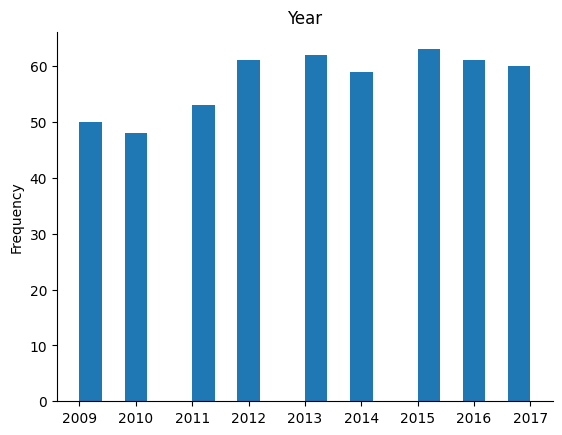

In [ ]:
from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

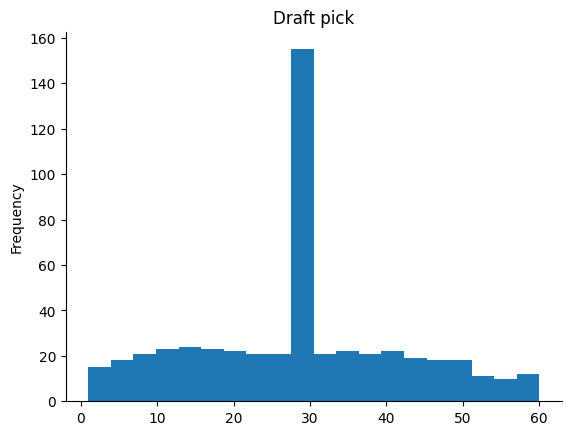

In [ ]:
from matplotlib import pyplot as plt
df['Draft pick'].plot(kind='hist', bins=20, title='Draft pick')
plt.gca().spines[['top', 'right',]].set_visible(False)

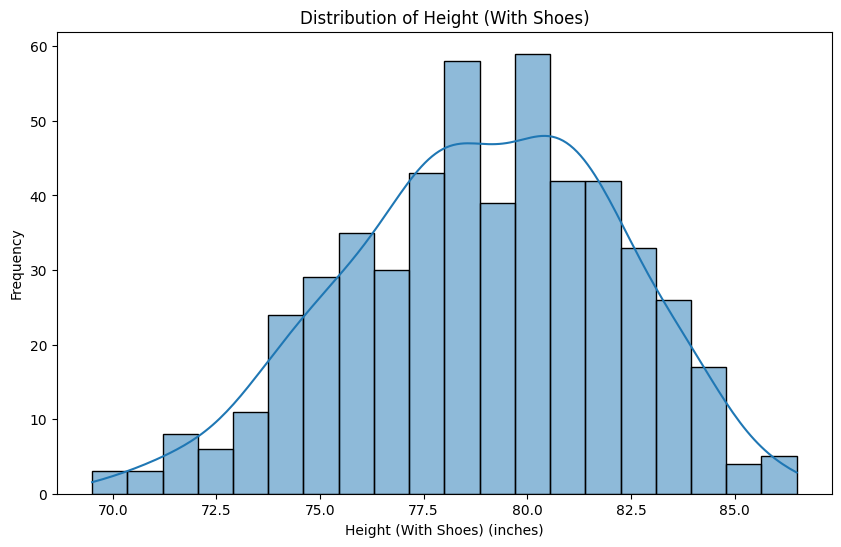

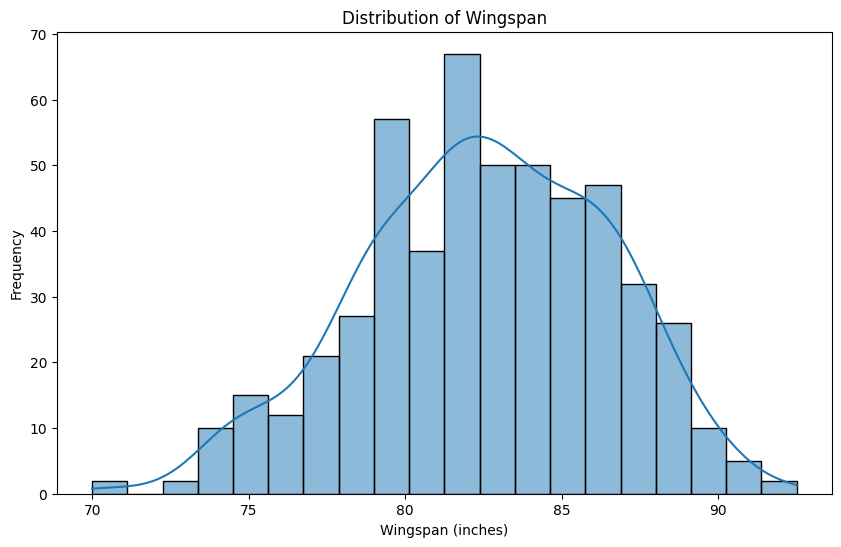

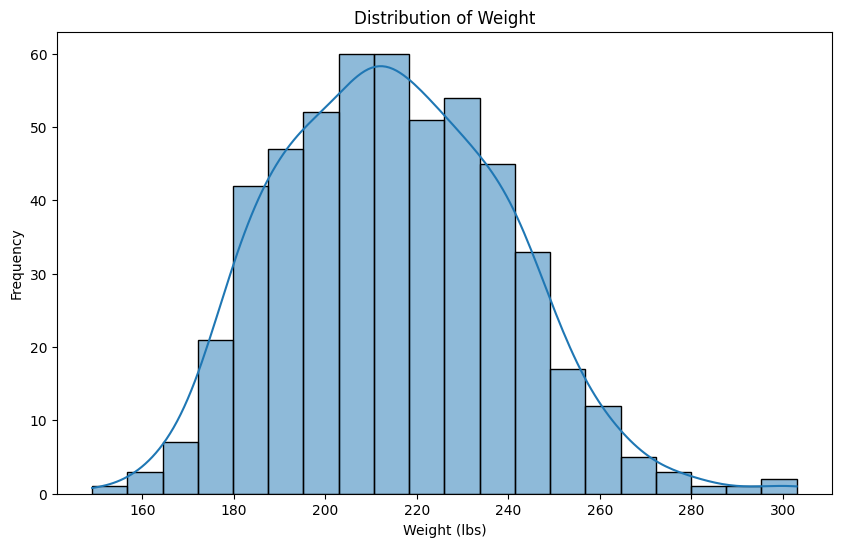

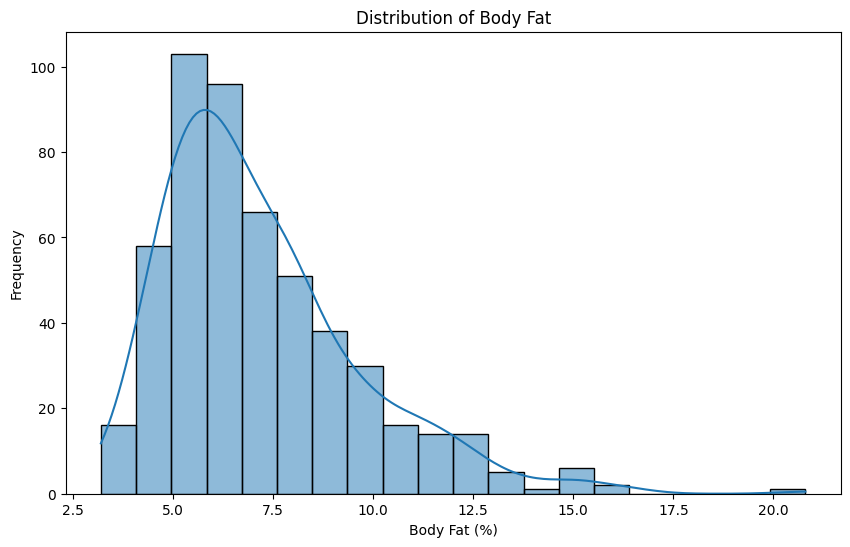

In [ ]:
# Distribution of Height (With Shoes)
plt.figure(figsize=(10, 6))
sns.histplot(df['Height (With Shoes)'], kde=True, bins=20)
plt.title('Distribution of Height (With Shoes)')
plt.xlabel('Height (With Shoes) (inches)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Wingspan
plt.figure(figsize=(10, 6))
sns.histplot(df['Wingspan'], kde=True, bins=20)
plt.title('Distribution of Wingspan')
plt.xlabel('Wingspan (inches)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, bins=20)
plt.title('Distribution of Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Body Fat
plt.figure(figsize=(10, 6))
sns.histplot(df['Body Fat'], kde=True, bins=20)
plt.title('Distribution of Body Fat')
plt.xlabel('Body Fat (%)')
plt.ylabel('Frequency')
plt.show()



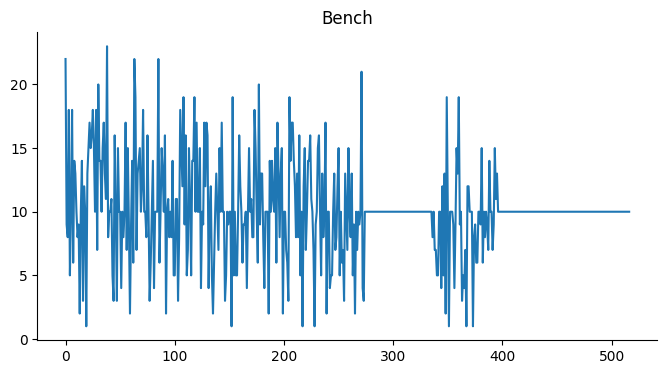

In [ ]:
from matplotlib import pyplot as plt
df['Bench'].plot(kind='line', figsize=(8, 4), title='Bench')
plt.gca().spines[['top', 'right']].set_visible(False)

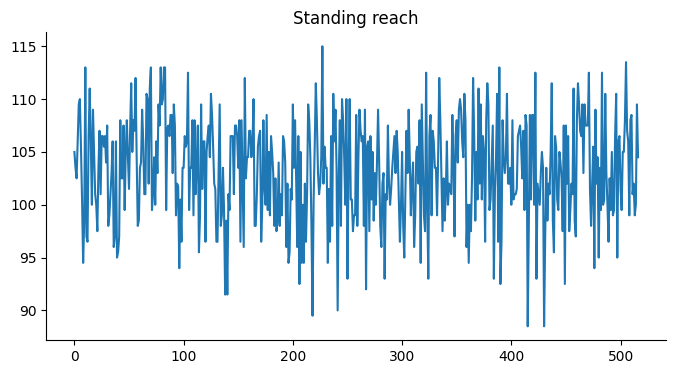

In [ ]:
from matplotlib import pyplot as plt
df['Standing reach'].plot(kind='line', figsize=(8, 4), title='Standing reach')
plt.gca().spines[['top', 'right']].set_visible(False)

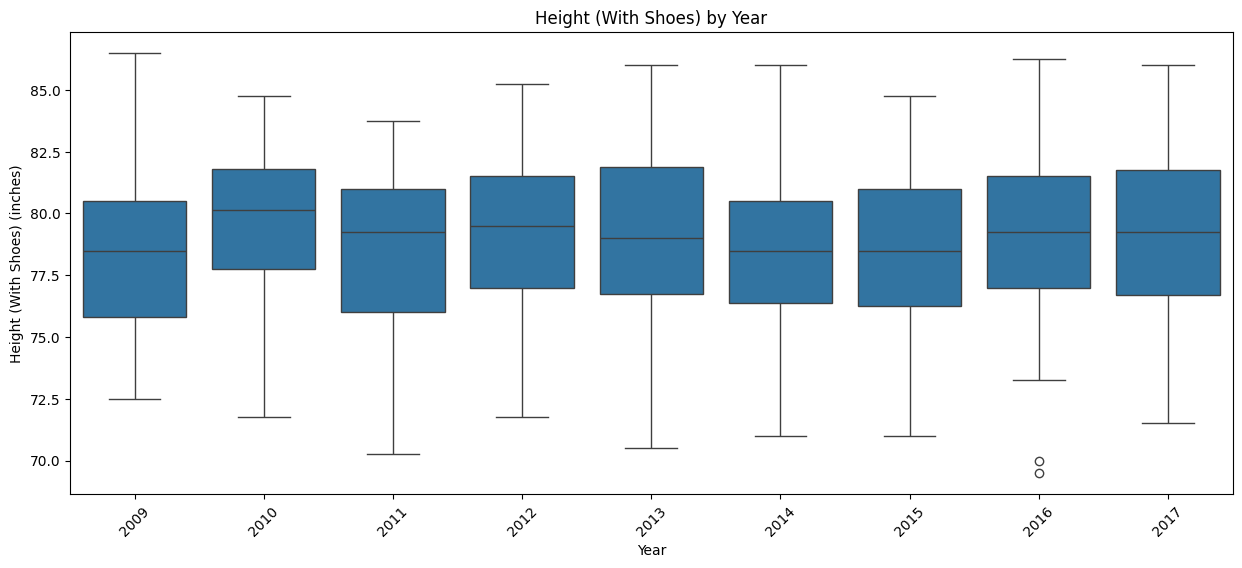

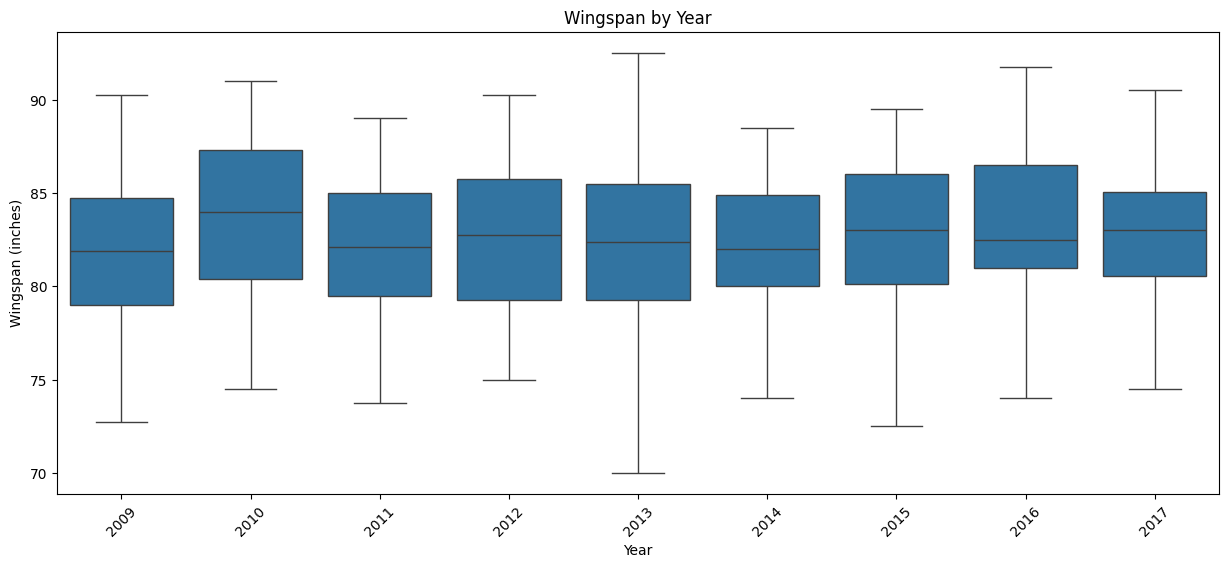

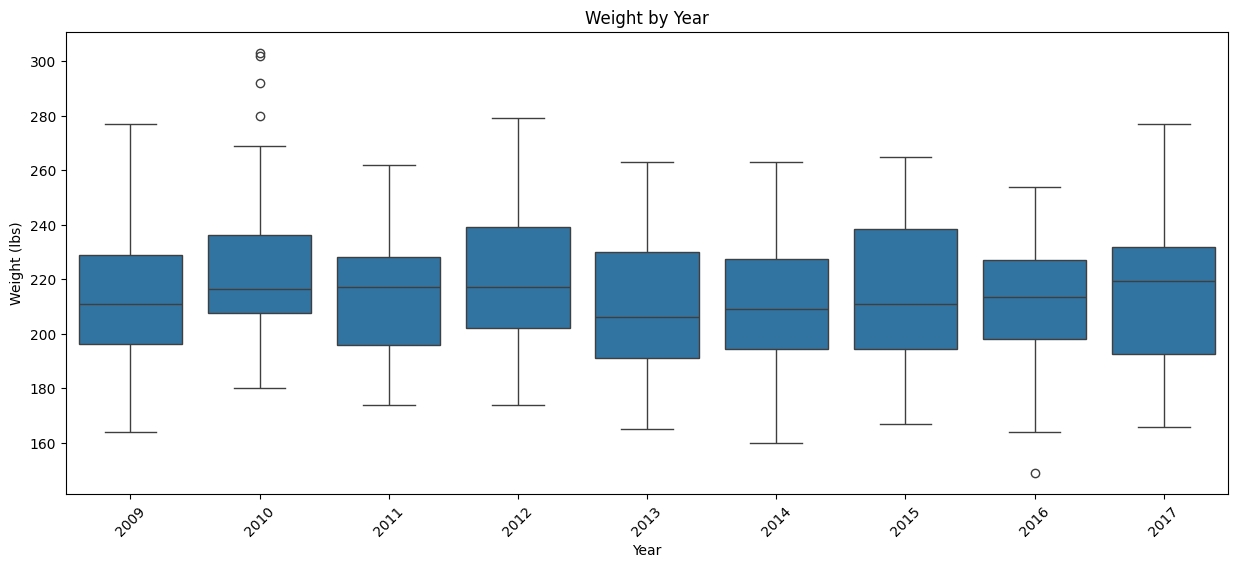

In [ ]:
# Box plot for Height (With Shoes) by Year
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='Height (With Shoes)', data=df)
plt.title('Height (With Shoes) by Year')
plt.xlabel('Year')
plt.ylabel('Height (With Shoes) (inches)')
plt.xticks(rotation=45)
plt.show()

# Box plot for Wingspan by Year
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='Wingspan', data=df)
plt.title('Wingspan by Year')
plt.xlabel('Year')
plt.ylabel('Wingspan (inches)')
plt.xticks(rotation=45)
plt.show()

# Box plot for Weight by Year
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='Weight', data=df)
plt.title('Weight by Year')
plt.xlabel('Year')
plt.ylabel('Weight (lbs)')
plt.xticks(rotation=45)
plt.show()


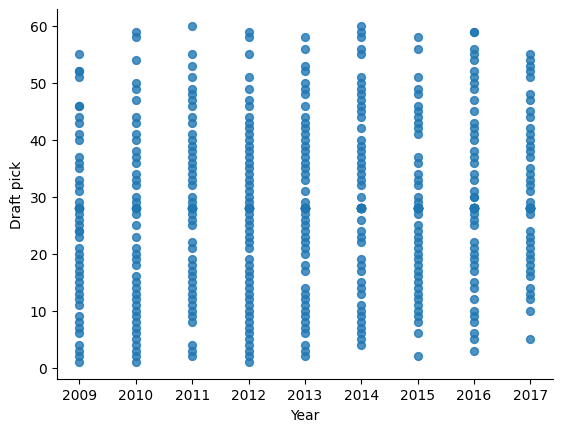

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Draft pick', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

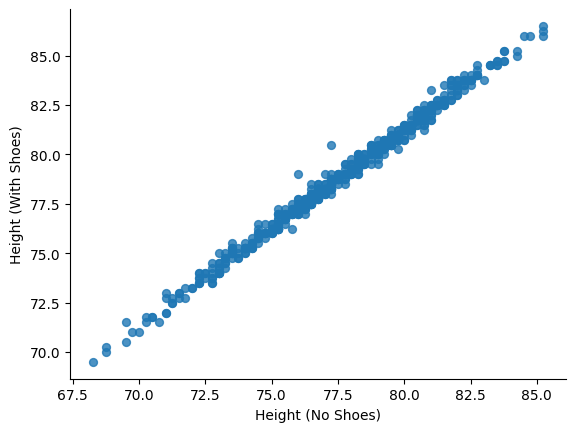

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Height (No Shoes)', y='Height (With Shoes)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

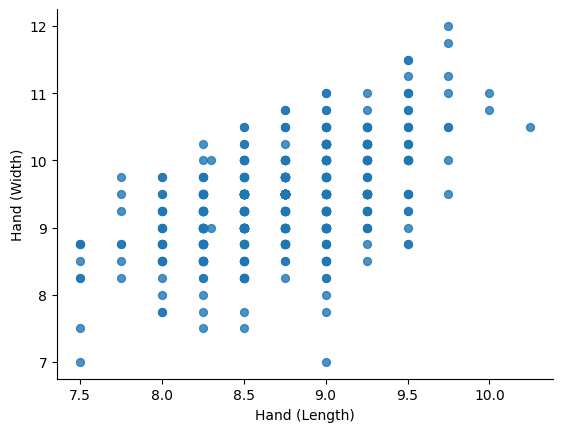

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Hand (Length)', y='Hand (Width)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

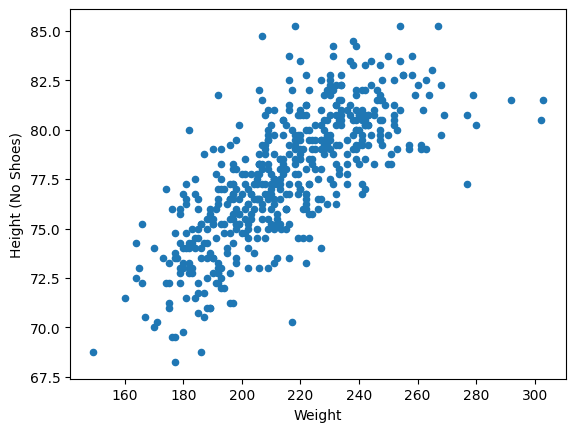

In [ ]:
# perform visualization and analysis on dataframe using matplotlib and pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Simple scatter plot
df.plot.scatter('Weight', 'Height (No Shoes)');

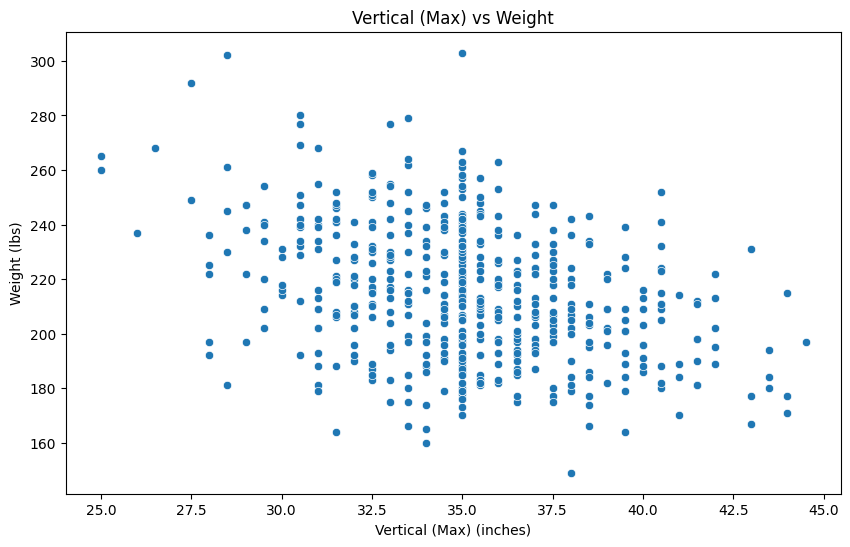

In [ ]:
# Scatter plot for Vertical (Max) vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vertical (Max)', y='Weight', data=df)
plt.title('Vertical (Max) vs Weight')
plt.xlabel('Vertical (Max) (inches)')
plt.ylabel('Weight (lbs)')
plt.show()


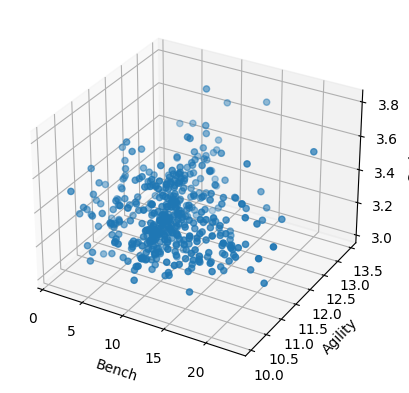

In [ ]:
#Bench vs Agility vs Sprint graph

# Create a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['Bench']
y = df['Agility']
z = df['Sprint']

ax.scatter(x, y, z)

ax.set_xlabel('Bench')
ax.set_ylabel('Agility')
ax.set_zlabel('Sprint')

plt.show()


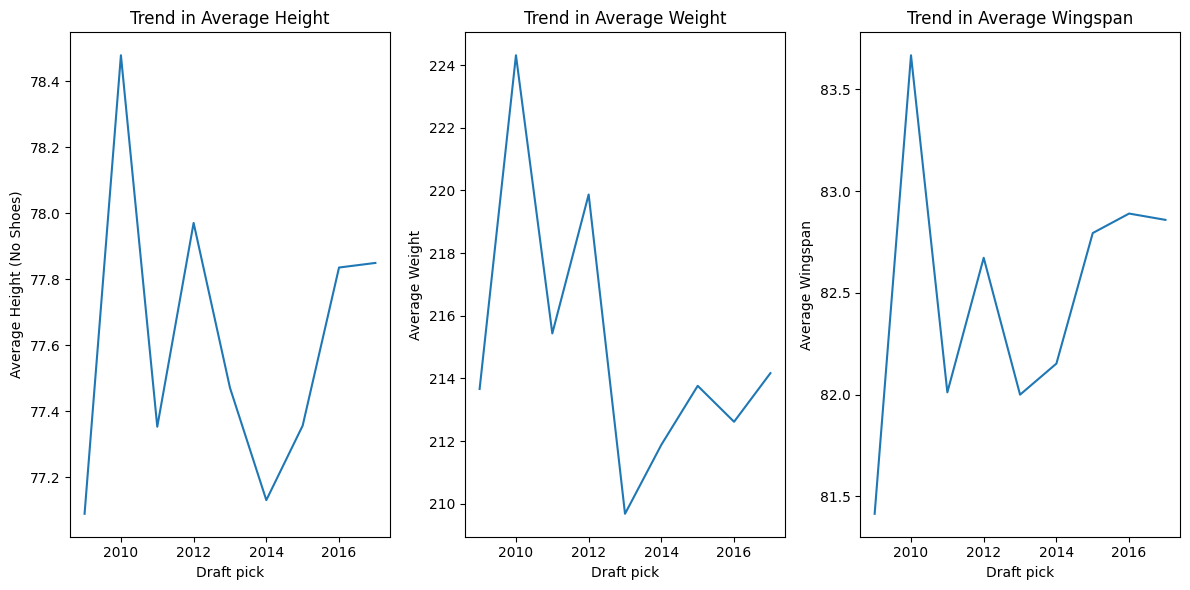

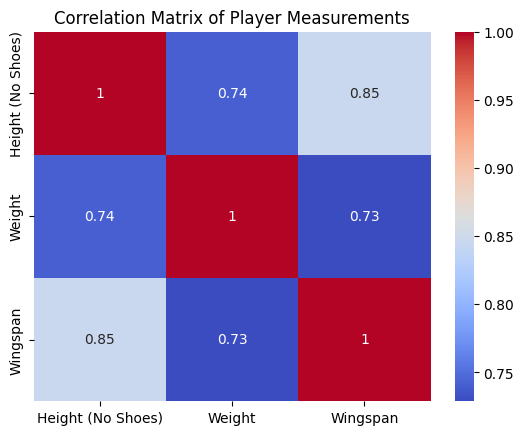

In [ ]:
# Plot the trends over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(yearly_averages.index, yearly_averages['Height (No Shoes)'])
plt.xlabel('Draft pick')
plt.ylabel('Average Height (No Shoes)')
plt.title('Trend in Average Height')

plt.subplot(1, 3, 2)
plt.plot(yearly_averages.index, yearly_averages['Weight'])
plt.xlabel('Draft pick')
plt.ylabel('Average Weight')
plt.title('Trend in Average Weight')

plt.subplot(1, 3, 3)
plt.plot(yearly_averages.index, yearly_averages['Wingspan'])
plt.xlabel('Draft pick')
plt.ylabel('Average Wingspan')
plt.title('Trend in Average Wingspan')

plt.tight_layout()
plt.show()

# Calculate the correlation matrix for the measurements
correlation_matrix = df[['Height (No Shoes)', 'Weight', 'Wingspan']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Player Measurements')
plt.show()

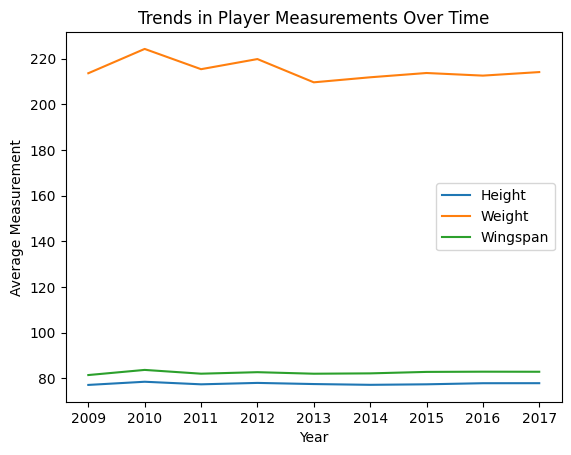

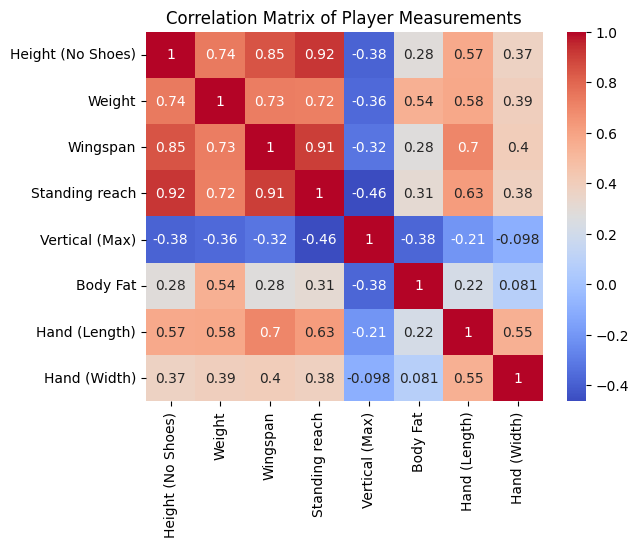

In [ ]:
# Group the data by year and calculate the average height, weight, and wingspan
yearly_averages = df.groupby('Year')[['Height (No Shoes)', 'Weight', 'Wingspan']].mean()

# Plot the trends over time
plt.plot(yearly_averages.index, yearly_averages['Height (No Shoes)'], label='Height')
plt.plot(yearly_averages.index, yearly_averages['Weight'], label='Weight')
plt.plot(yearly_averages.index, yearly_averages['Wingspan'], label='Wingspan')
plt.xlabel('Year')
plt.ylabel('Average Measurement')
plt.title('Trends in Player Measurements Over Time')
plt.legend()
plt.show()

# Calculate the correlation matrix for the measurements
correlation_matrix = df[['Height (No Shoes)', 'Weight', 'Wingspan', 'Standing reach', 'Vertical (Max)', 'Body Fat', 'Hand (Length)', 'Hand (Width)']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Player Measurements')
plt.show()

# Analyze the trends and correlations to identify insights:

# 1. Increasing Height and Wingspan: Observe if there's a trend of increasing height and wingspan over the years, suggesting a preference for taller and longer-limbed players.
# 2. Weight Trends: Analyze if there are any notable changes in average player weight over time, indicating shifts in body composition preferences.
# 3. Correlation between Measurements: Identify strong correlations between different measurements, such as height and wingspan, or weight and vertical jump, to understand the relationships between physical attributes.
# 4. Outlier Detection: Look for any outliers in the data, which could represent exceptional players with unique physical characteristics.

# By examining these trends and correlations, you can gain insights into how player measurements have evolved over time and how different physical attributes relate to each other in basketball.

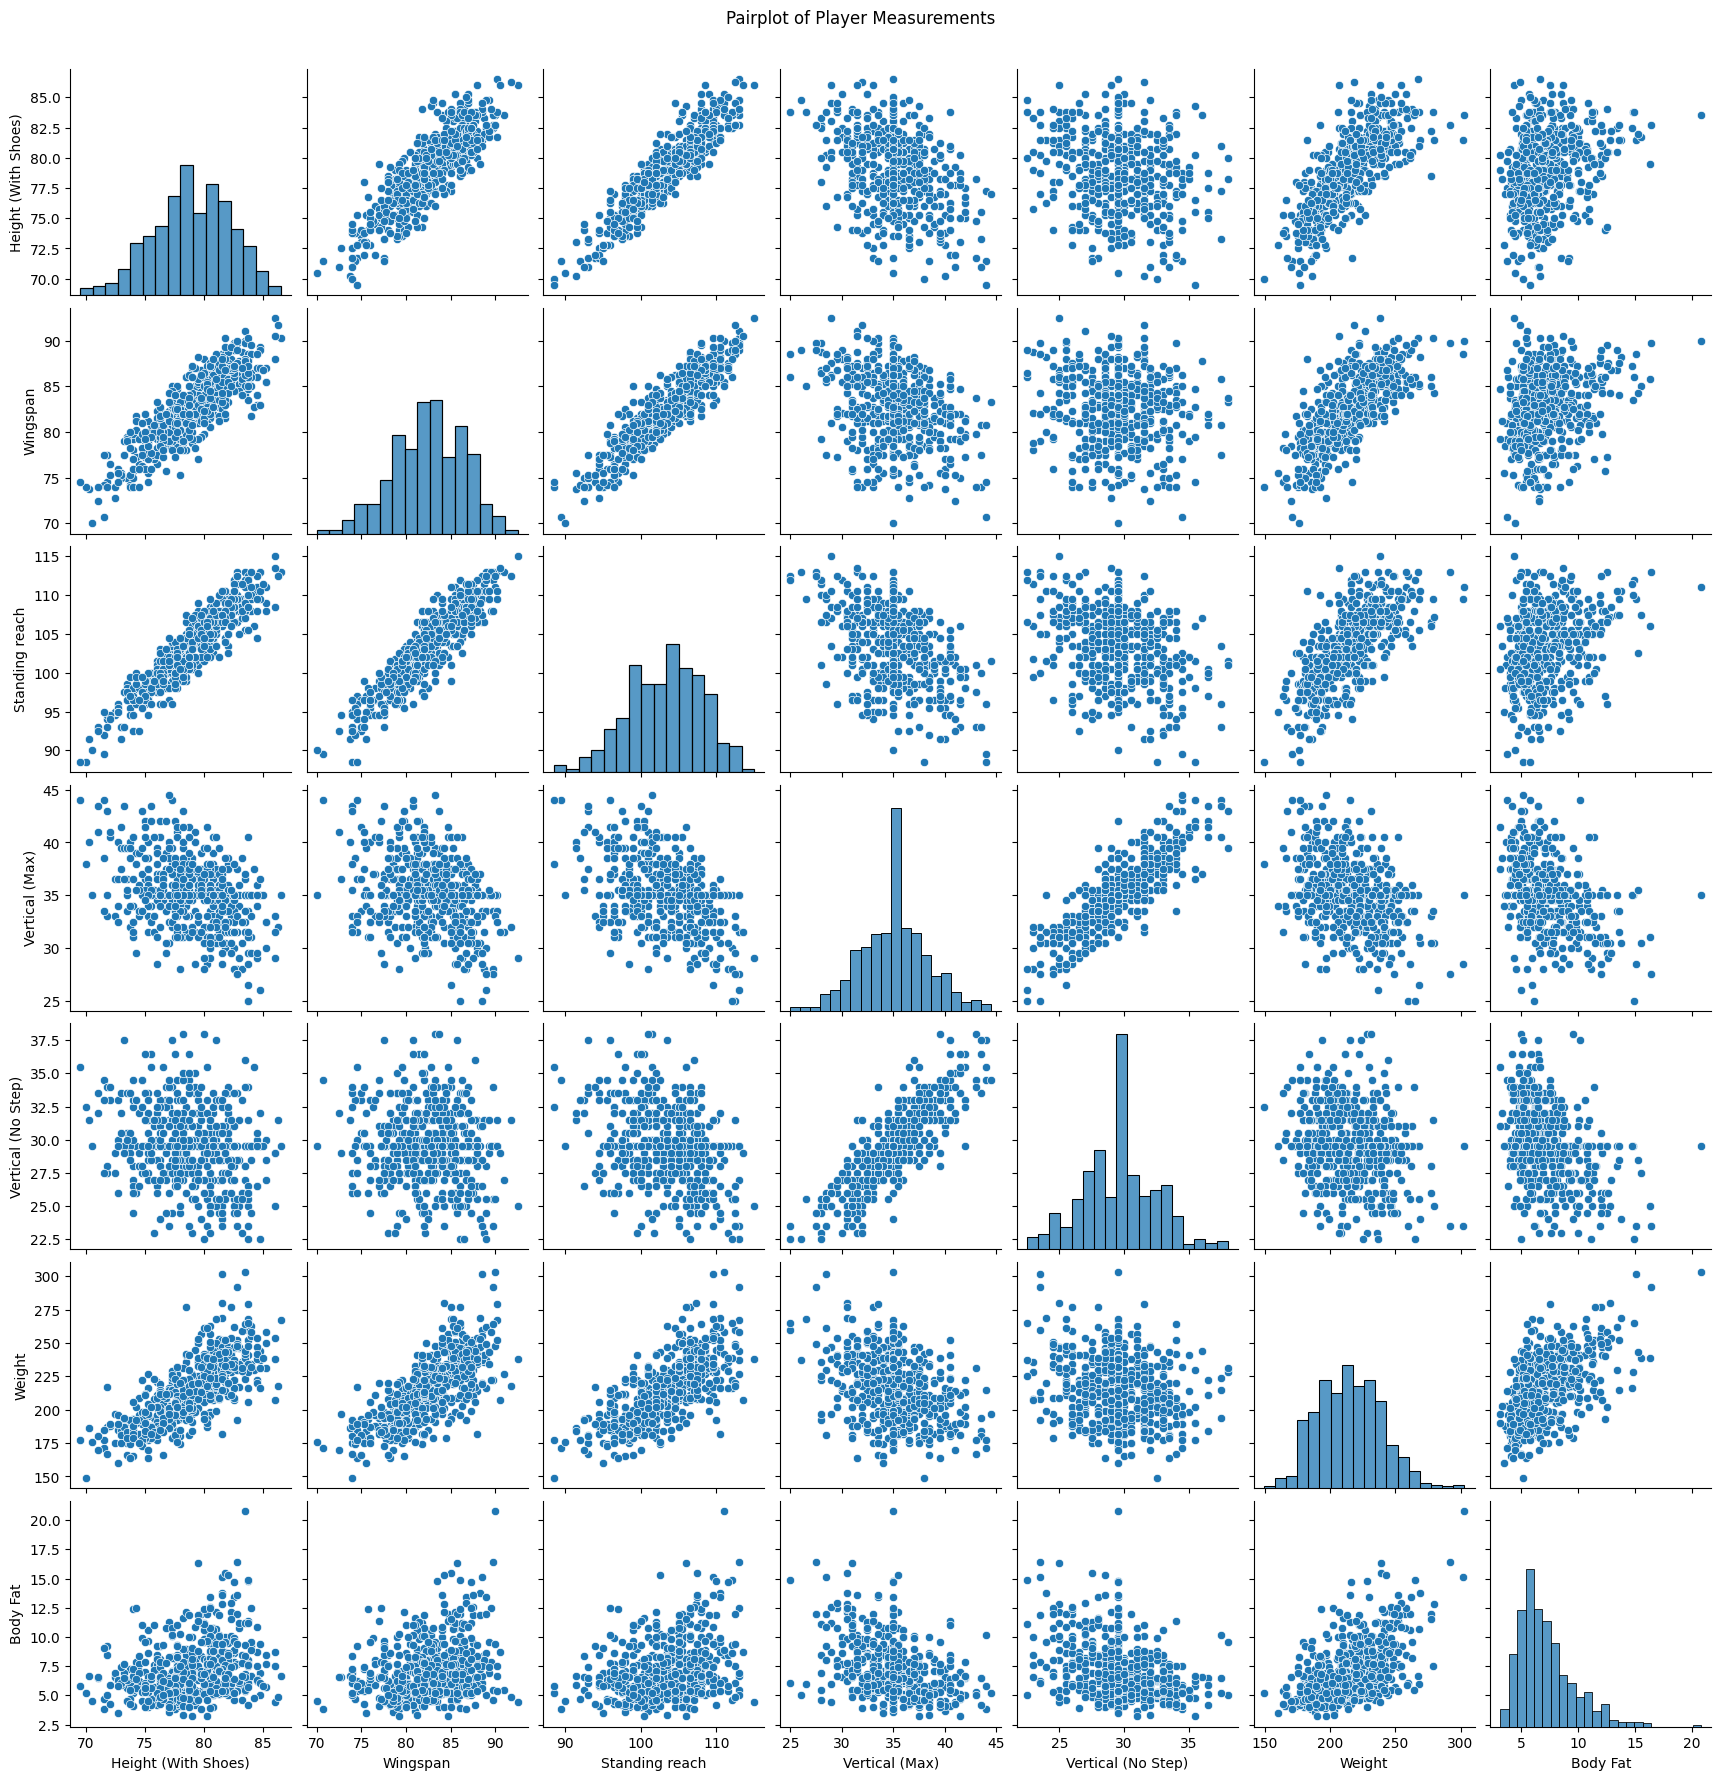

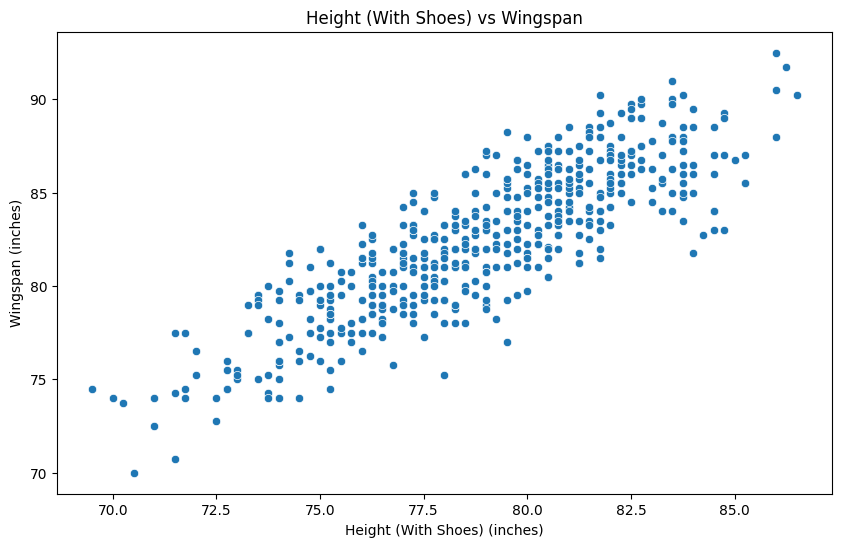

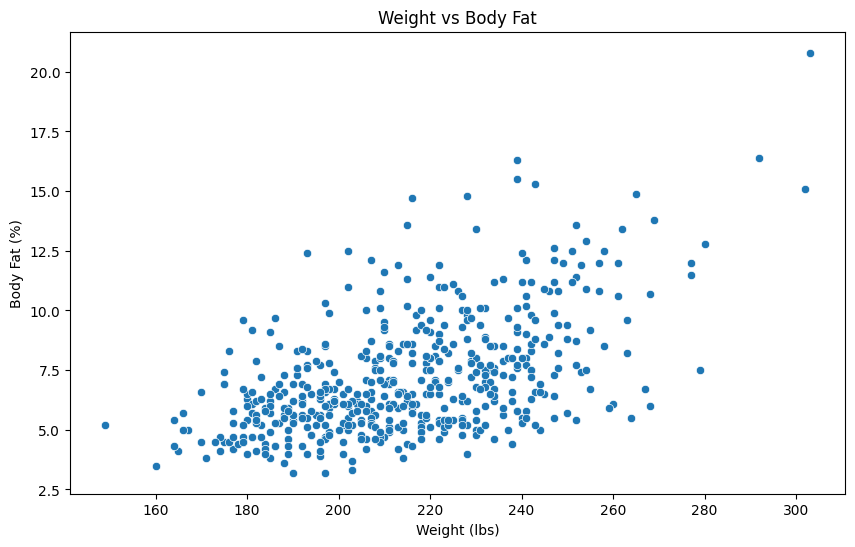

In [ ]:
# Pairplot of selected measurements
selected_features = [
    'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
    'Vertical (No Step)', 'Weight', 'Body Fat'
]

sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Player Measurements', y=1.02)
plt.show()

# Scatter plot for Height (With Shoes) vs Wingspan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (With Shoes)', y='Wingspan', data=df)
plt.title('Height (With Shoes) vs Wingspan')
plt.xlabel('Height (With Shoes) (inches)')
plt.ylabel('Wingspan (inches)')
plt.show()

# Scatter plot for Weight vs Body Fat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Body Fat', data=df)
plt.title('Weight vs Body Fat')
plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat (%)')
plt.show()


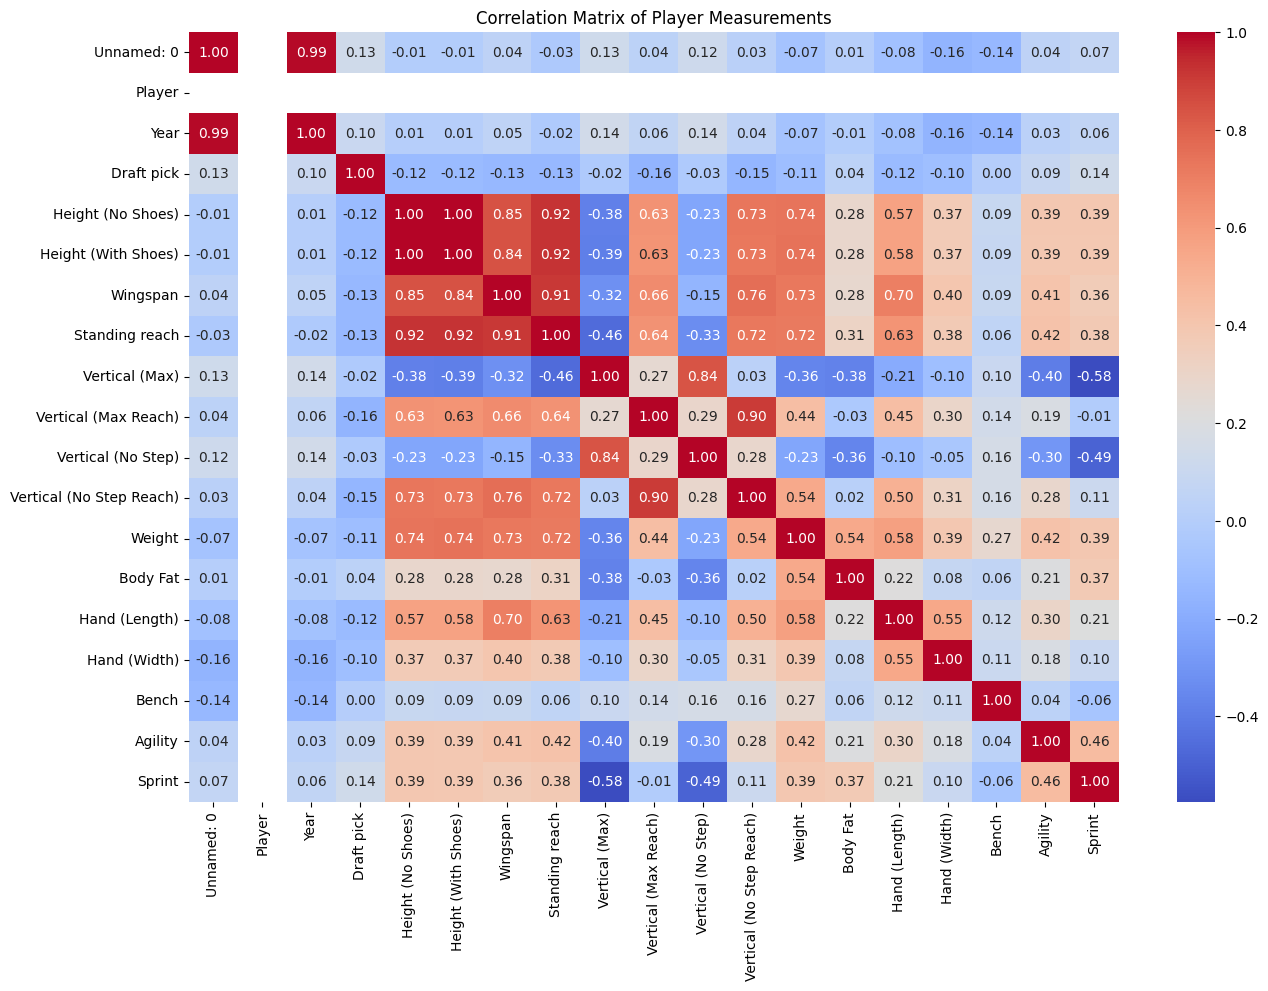

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Player Measurements')
plt.show()


Index(['Player'], dtype='object')


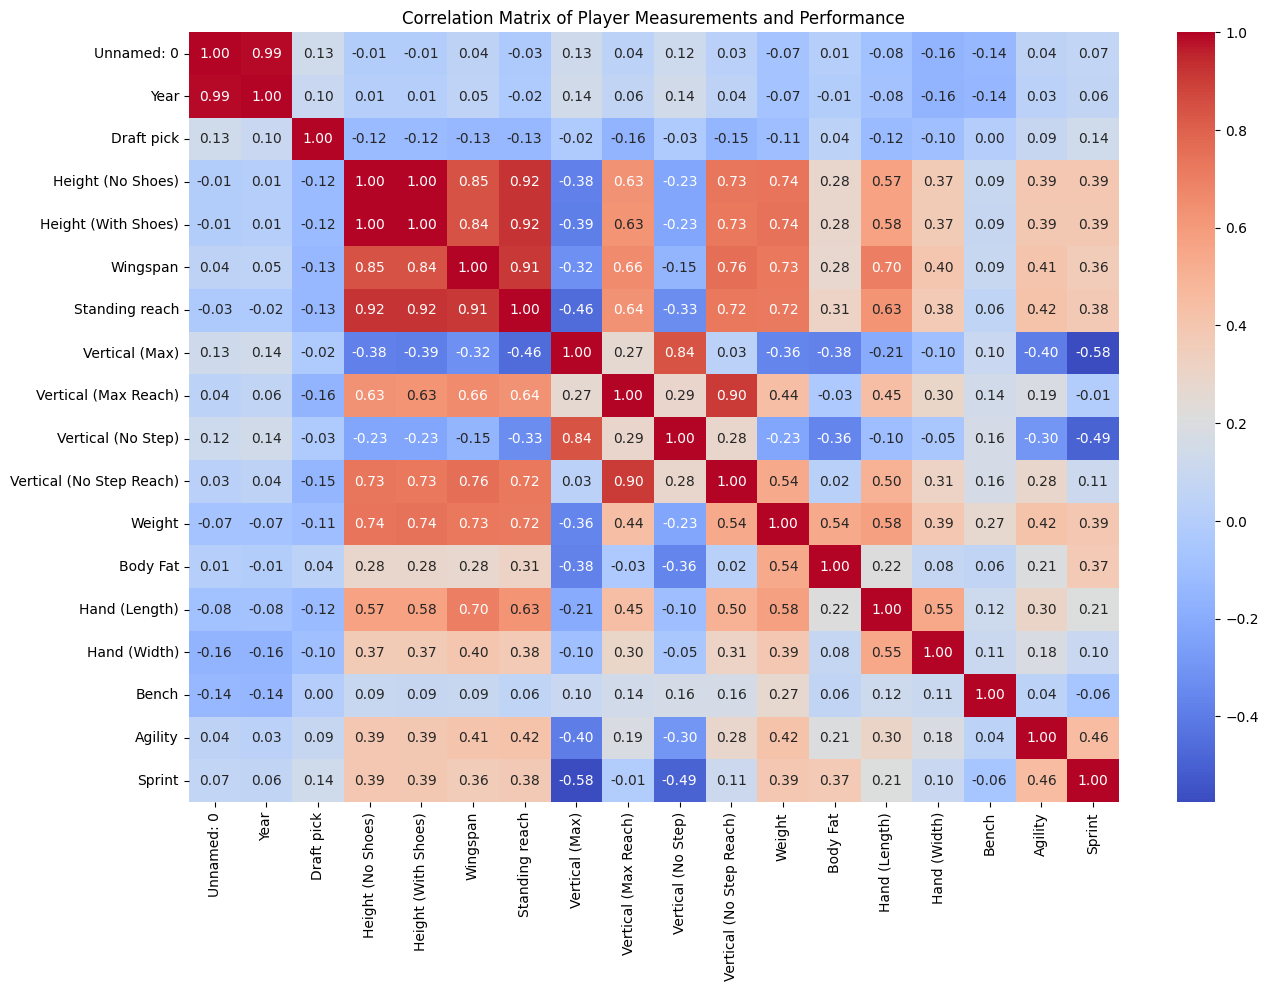

In [ ]:
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

# If 'Player' column exists and is non-numeric, drop it before calculating correlation
if 'Player' in df.columns and 'Player' in non_numeric_cols:
    corr_matrix = df.drop('Player', axis=1).corr()
else:
    # Handle the situation where 'Player' column is not found or is numeric
    # You may need to investigate further to identify the problematic column
    print("Column 'Player' not found or is numeric. Further investigation needed.")

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Player Measurements and Performance')
plt.show()

**Machine Learning**





In [ ]:
# Data preprocessing: drop rows with missing target values and handle other NaNs if any
df = df.dropna(subset=['Draft pick'])

# Selecting features and target variable
X = df[['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)', 'Weight', 'Body Fat']]
y = df['Draft pick']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Testing R^2: {test_r2:.2f}')


Training MSE: 177.53
Testing MSE: 194.89
Training R^2: 0.04
Testing R^2: 0.02


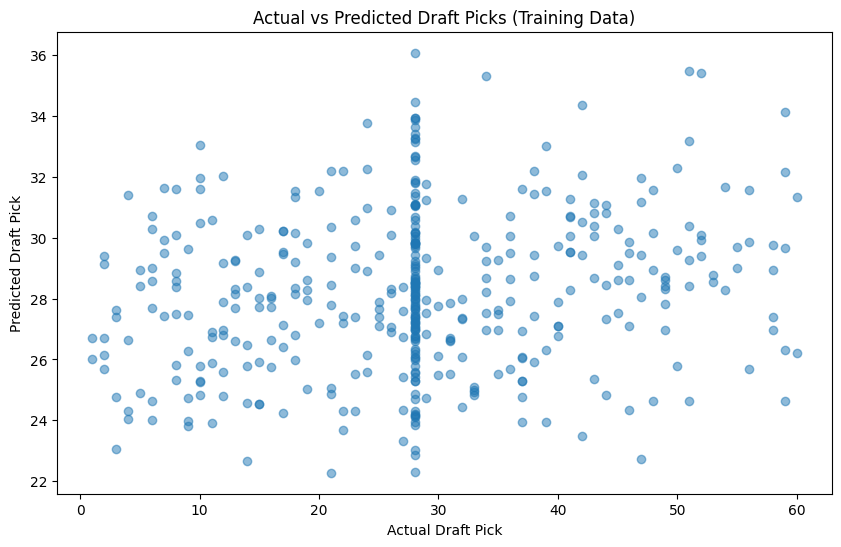

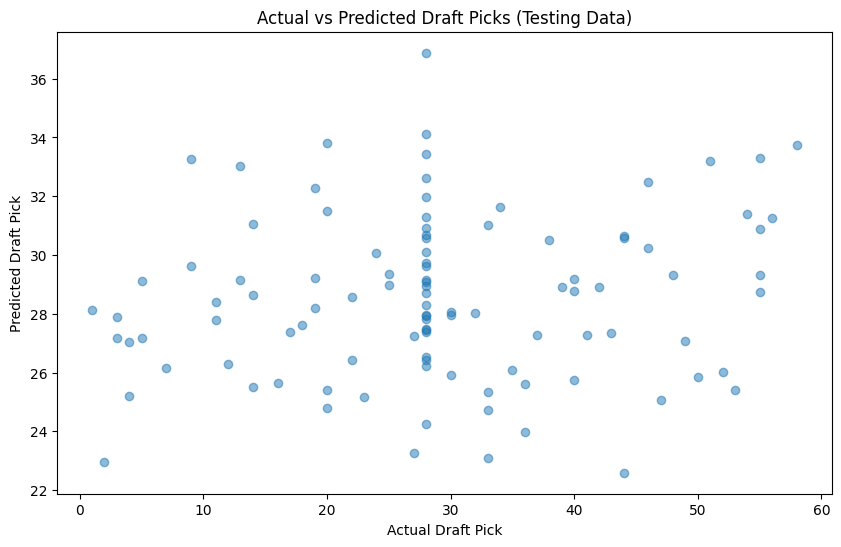

In [ ]:
# Scatter plot for actual vs predicted draft picks (training data)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.title('Actual vs Predicted Draft Picks (Training Data)')
plt.xlabel('Actual Draft Pick')
plt.ylabel('Predicted Draft Pick')
plt.show()

# Scatter plot for actual vs predicted draft picks (testing data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Actual vs Predicted Draft Picks (Testing Data)')
plt.xlabel('Actual Draft Pick')
plt.ylabel('Predicted Draft Pick')
plt.show()


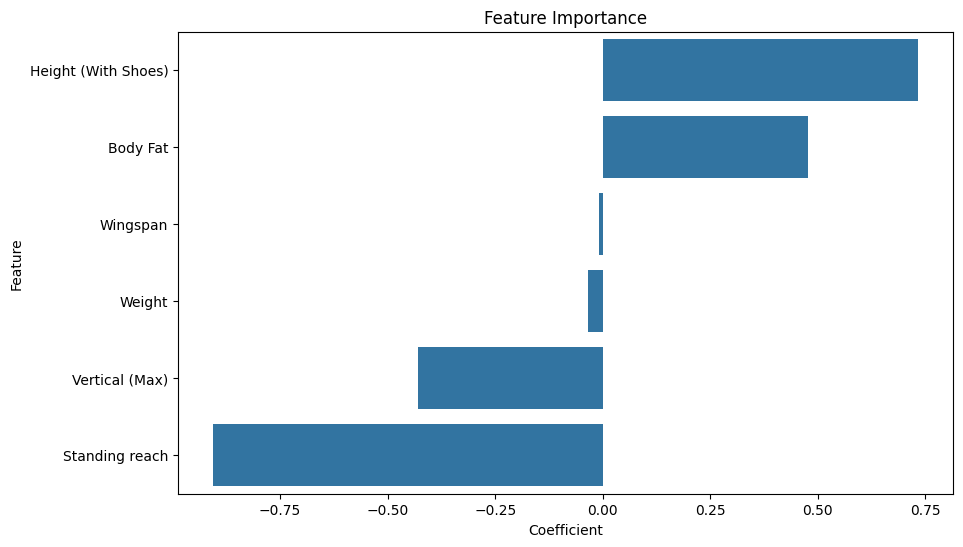

In [ ]:
# Visualize feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Select relevant features for clustering
features = [
    'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
    'Vertical (No Step)', 'Weight', 'Body Fat'
]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Player'] = df['Player']


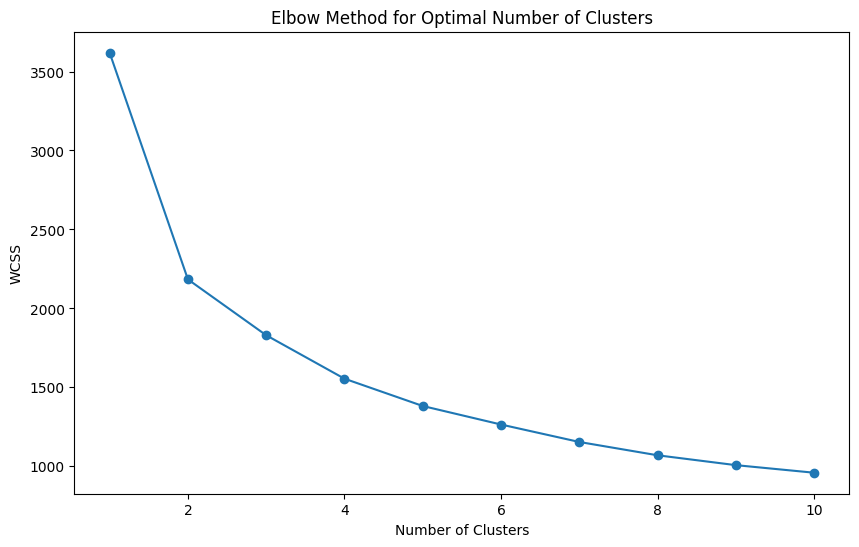

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


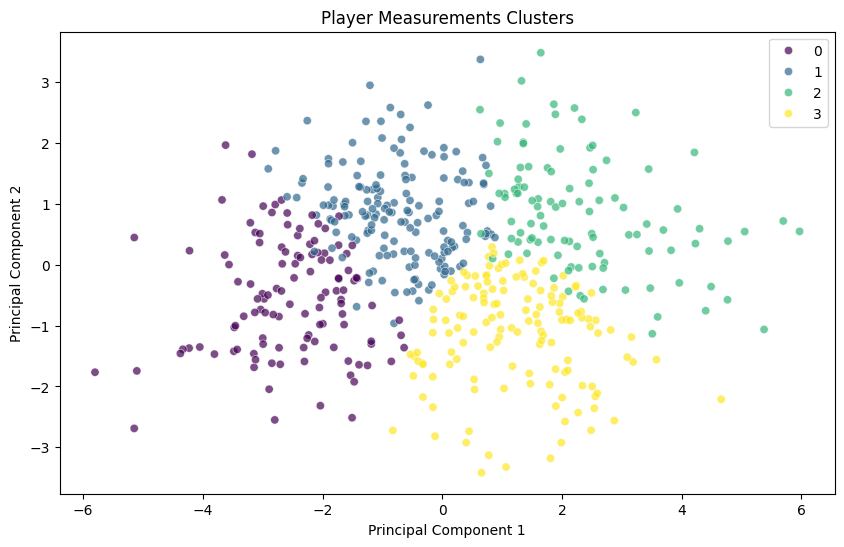

In [ ]:
# Fit K-Means with the optimal number of clusters (choose based on the elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca, alpha=0.7)
plt.title('Player Measurements Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


<Figure size 1400x800 with 0 Axes>

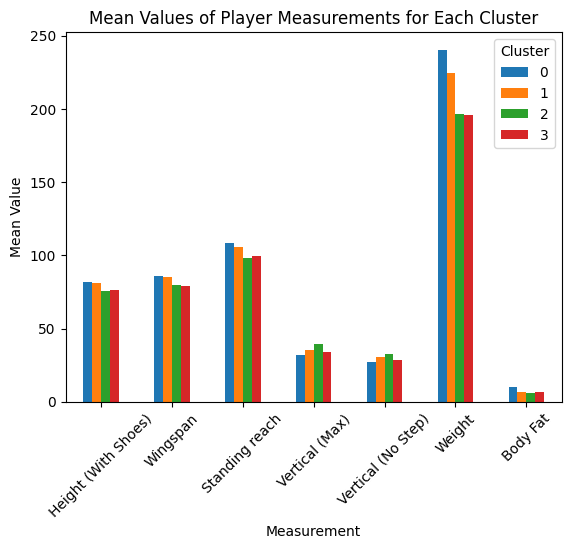

In [ ]:
# Analyze the clusters by looking at the mean values of the original features
df['Cluster'] = kmeans.labels_
cluster_means = df.groupby('Cluster')[features].mean()

# Plot the mean values for each cluster
plt.figure(figsize=(14, 8))
cluster_means.T.plot(kind='bar')
plt.title('Mean Values of Player Measurements for Each Cluster')
plt.xlabel('Measurement')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


## **Dashboard**

In [ ]:
!pip install dash
!pip install dash-bootstrap-components
!pip install pandas
!pip install plotly

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
df = pd.read_csv('nba_draft_combine_all_years_cleaned.csv')


In [ ]:
# Initialize the app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.Img(src="https://upload.wikimedia.org/wikipedia/en/0/03/NBA_logo.svg", height="100px")),
        dbc.Col(html.H1("NBA Draft Combine Dashboard"), className="text-center"),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in sorted(df['Year'].unique())],
            value=df['Year'].min(),
            clearable=False,
        )),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id='agility-sprint-chart'), width=6),
        dbc.Col(dcc.Graph(id='bench-donut-chart'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='top-sprinters-chart'), width=6),
        dbc.Col(dcc.Graph(id='bodyfat-weight-chart'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='height-chart'), width=6),
        dbc.Col(dcc.Graph(id='vertical-reach-pie-chart'), width=6),
    ]),
], fluid=True)


In [ ]:
@app.callback(
    Output('agility-sprint-chart', 'figure'),
    Output('bench-donut-chart', 'figure'),
    Output('top-sprinters-chart', 'figure'),
    Output('bodyfat-weight-chart', 'figure'),
    Output('height-chart', 'figure'),
    Output('vertical-reach-pie-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_charts(selected_year):
    filtered_df = df[df['Year'] == selected_year]

    # 1) Clustered Column Chart for Max of Agility and Sprint by Player
    fig_agility_sprint = px.bar(filtered_df, x='Player', y=['Agility', 'Sprint'], barmode='group',
                                title='Max of Agility and Sprint by Player')

    # 2) Donut Chart for Players Benched Max Times
    fig_bench_donut = px.pie(filtered_df, names='Player', values='Bench', hole=0.4,
                             title='Players Benched Max Times')

    # 3) Line and Clustered Column Chart for Top 5 Sprinters
    top_sprinters = filtered_df.nsmallest(5, 'Sprint')
    fig_top_sprinters = px.bar(top_sprinters, x='Player', y='Sprint', title='Top 5 Sprinters')

    # 4) Stacked Bar Chart for Average Body Fat and Weight by Player
    avg_bodyfat_weight = filtered_df.groupby('Player')[['Body Fat', 'Weight']].mean().reset_index()
    fig_bodyfat_weight = px.bar(avg_bodyfat_weight, x='Player', y=['Body Fat', 'Weight'], barmode='stack',
                                title='Average of Body Fat and Average Weight by Player')

    # 5) Line and Clustered Column Chart for Top-5 Players by Height
    top_height = filtered_df.nlargest(5, 'Height (With Shoes)')
    fig_height = px.bar(top_height, x='Player', y=['Height (No Shoes)', 'Height (With Shoes)'], barmode='group',
                        title='Top-5 Players by Height')

    # 6) Pie Chart for Top 5 Players by Max Vertical Reach
    top_vertical_reach = filtered_df.nlargest(5, 'Vertical (Max Reach)')
    fig_vertical_reach_pie = px.pie(top_vertical_reach, names='Player', values='Vertical (Max Reach)',
                                    title='Top 5 Players by Max Vertical Reach')

    return (fig_agility_sprint, fig_bench_donut, fig_top_sprinters, fig_bodyfat_weight,
            fig_height, fig_vertical_reach_pie)


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


<IPython.core.display.Javascript object>